In [102]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('C:/Users/Show/Desktop/customer-behavior-taobao')
%matplotlib inline
random.seed(1231)

In [103]:
df=pd.read_csv('ab_data.csv') #import data

In [104]:
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [106]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [107]:
df.shape

(294478, 5)

In [108]:
df.user_id.nunique() # 290584 users in this test

290584

In [109]:
df.converted.mean()

0.11965919355605512

In [110]:
df.isnull().sum() # none of miss values

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [111]:
df.groupby(['group','landing_page']).count() #since the group rows unevent

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [112]:
treatment= df['group']=='treatment'
new_page=df['landing_page']=='new_page'
mismatch=treatment != new_page
mismatch.sum()  #3893 rows are not match

3893

In [113]:
df1 = df[~mismatch].copy() #rebuild other dataframe

In [114]:
df1[((df1['group']=='treatment')==(df1['landing_page']=='new_page'))==False].shape[0] #check the complete data frame without mismatch

0

In [115]:
df1[((df1['group']=='control')==(df1['landing_page']=='old_page'))==False ].shape[0] #check the data frame without mismatch

0

In [116]:
df1.shape

(290585, 5)

In [117]:
df1.user_id.nunique() #after data cleasning still have 290584 users in test, but we have one duplicated value

290584

In [118]:
df1[df1.user_id.duplicated(keep=False)].user_id

1899    773192
2893    773192
Name: user_id, dtype: int64

In [119]:
df1.query('user_id=="773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [120]:
df1=df1.drop_duplicates(subset=['user_id'],keep="first")
sum(df1.duplicated())

0

In [121]:
df1.shape

(290584, 5)

In [122]:
df1.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [123]:
df1.converted.mean() #conversion rate is 12% in whold test

0.11959708724499628

In [124]:
df1.query('group=="control"')['converted'].mean() # conversion rate 12% in control group

0.1203863045004612

In [125]:
df1.query('group =="treatment"')['converted'].mean() #conversion rate 11.9% in treatment group

0.11880806551510564

In [126]:
df1.query('landing_page=="new_page"').shape[0]/df1.shape[0] #50% landing on new page by new data frame

0.5000619442226688

Null Hypothesis: P_new-P_old <= 0
Alternative Hypothesis: P_new-P_old > 0

In [127]:
df1.groupby(['group','landing_page']).count()

,,user_id,timestamp,converted
group,landing_page,,,
control,old_page,145274,145274,145274
treatment,new_page,145310,145310,145310


In [128]:
p_new=df1.query('landing_page=="new_page"')['converted'].mean()
p_new #11.9% convert rate in new page

0.11880806551510564

In [129]:
p_old = df1.query('landing_page == "old_page"')['converted'].mean()
p_old # 12% old page convert rate

0.1203863045004612

In [130]:
n_new=df1.query('landing_page == "new_page"').shape[0]
n_new #how many rows

145310

In [131]:
n_old = df1.query('landing_page == "old_page"').shape[0]
n_old

145274

In [132]:
random.seed(267)
old_page_converted = np.random.choice(2,size=n_old,p=[1-p_old,p_old])
old_page_converted

array([0, 1, 0, ..., 1, 0, 0])

In [133]:
random.seed(767)
new_page_converted = np.random.choice(2,size=n_new,p=[1-p_new,p_new])
new_page_converted

array([0, 0, 0, ..., 1, 1, 0])

In [134]:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

0.0007068606420967544

In [135]:
p_diff = []
for i in range(10000):
    p_new_diff = np.random.choice(2,size=n_new,p=[1-p_new,p_new]).mean()
    p_old_diff = np.random.choice(2,size=n_old,p=[1-p_old,p_old]).mean()
    p_diff.append(p_new_diff-p_old_diff)

(array([  10.,   89.,  421., 1419., 2557., 2851., 1790.,  680.,  160.,
          23.]),
 array([-6.22413165e-03, -5.32731549e-03, -4.43049934e-03, -3.53368318e-03,
        -2.63686703e-03, -1.74005088e-03, -8.43234723e-04,  5.35814304e-05,
         9.50397584e-04,  1.84721374e-03,  2.74402989e-03]),
 <BarContainer object of 10 artists>)

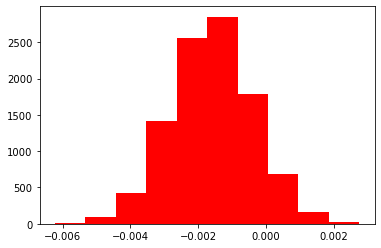

In [136]:
p_diff = np.array(p_diff)
plt.hist(p_diff,color='red') #seems like normal distribution

In p_diff data frame, how many rate greather than our database

In [137]:
obs_diff = df1.query('landing_page=="new_page"')['converted'].mean()- df1.query('landing_page=="old_page"')['converted'].mean()
obs_diff

-0.0015782389853555567

In [138]:
(p_diff > obs_diff).mean() #p-value is 0.5042 which is greather than 0.05, we conclude that we cannot reject the null hypothesis

0.4931

Logistic Rregression Analysis

In [139]:
import statsmodels.api as sm

In [140]:
df1['ab_page'] = df1.group.map({'treatment':1,'control':0})
df1['intercept'] = 1

In [141]:
logit_mod = sm.Logit(df1['converted'],df1[['intercept','ab_page']])
result=logit_mod.fit() # optimization terminate by using logistic model

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [142]:
result.summary() #corrlation is 0.1899.

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 01 Feb 2021   Pseudo R-squ.:               8.077e-06
Time:                        12:04:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

Concolusion:ab_page p-vale is 0.1889 by using the logistic model, but in the first part, p-value is 0.5042 by one-tailed test. After above anaysis, the ab_page might not good match to be predict the convert rate. Dependent on our model, we cannot conclude that the new mothod that can raise the PV and UV in our website. we need more data or add other metrics to continuous.